In [ ]:
# Repositorio git
# https://github.com/nilosaj/posgrad2024_alg_cluster

### Bibliotecas e leitura do Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2 Escolha da base de dados

## 2.1 Leitura do Dataset

In [1]:
country_data_df = pd.read_csv('./data/Country-data.csv')
country_data_df

NameError: name 'pd' is not defined

In [256]:
# ajuste dos tipos de dados
cols = country_data_df.columns.drop('country')
country_data_df[cols] = country_data_df[cols].apply(pd.to_numeric, errors='coerce')
country_data_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## 2.2 Total de países

In [257]:
print(f"Total de paises: {country_data_df['country'].unique().size}")

Total de paises: 167


## 2.3 Faixa dinâmica e analise dos resultados

In [258]:
# revisão ddos daods minimos
country_data_df.min()

country       Afghanistan
child_mort            2.6
exports             0.109
health               1.81
imports            0.0659
income                609
inflation           -4.21
life_expec           32.1
total_fer            1.15
gdpp                  231
dtype: object

In [259]:
# revisão dos dados máximos
country_data_df.max()

country       Zambia
child_mort     208.0
exports        200.0
health          17.9
imports        174.0
income        125000
inflation      104.0
life_expec      82.8
total_fer       7.49
gdpp          105000
dtype: object

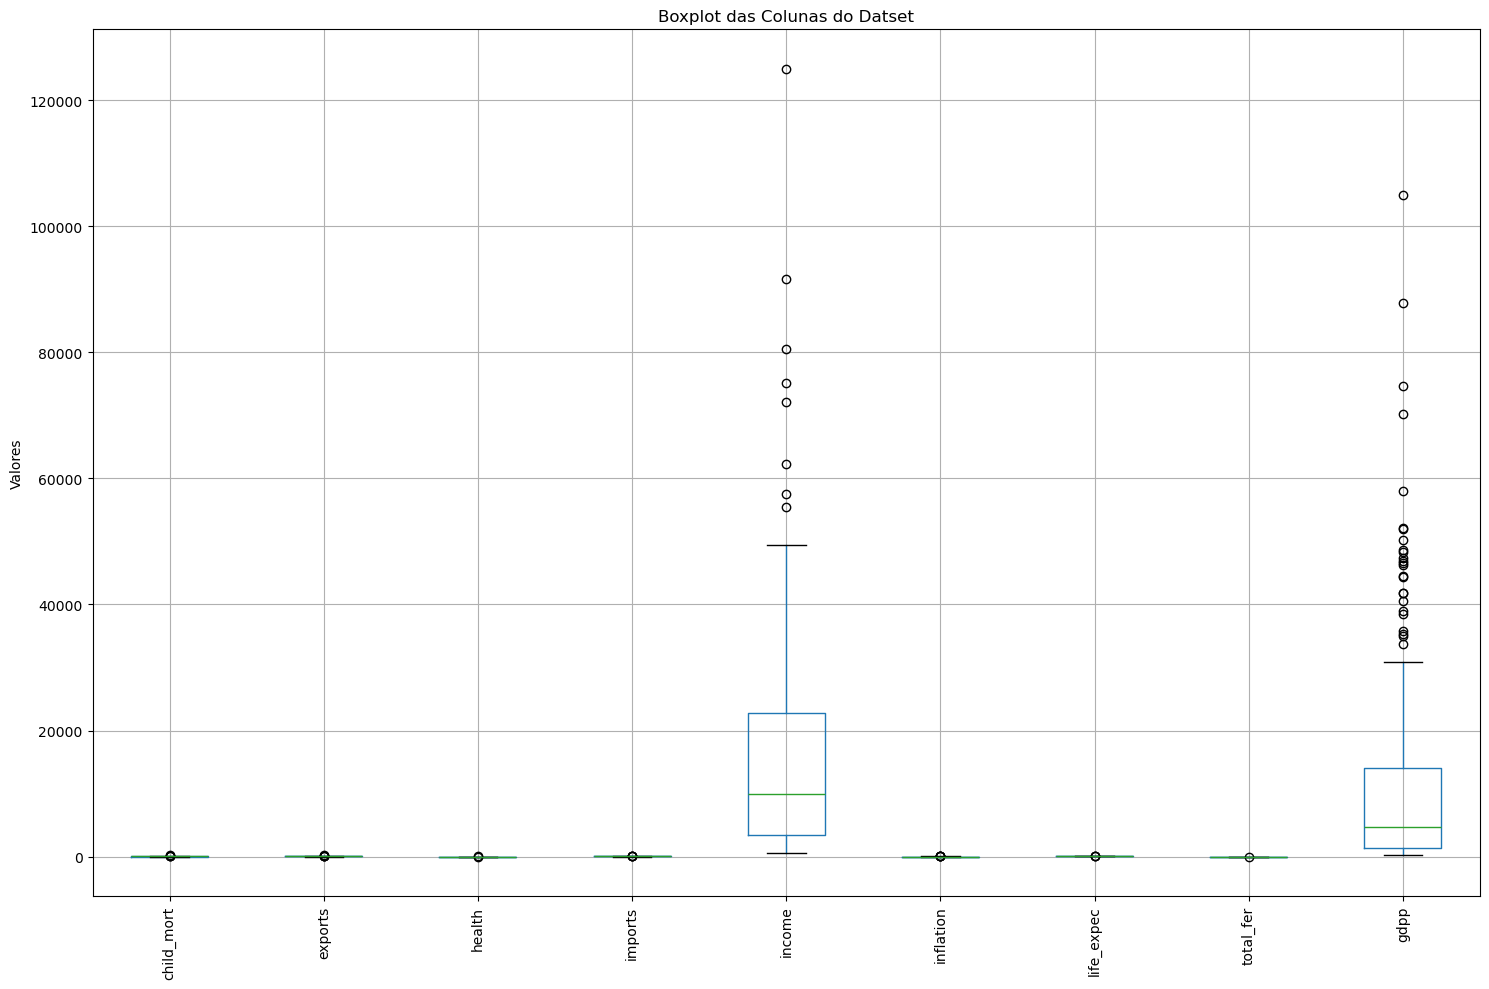

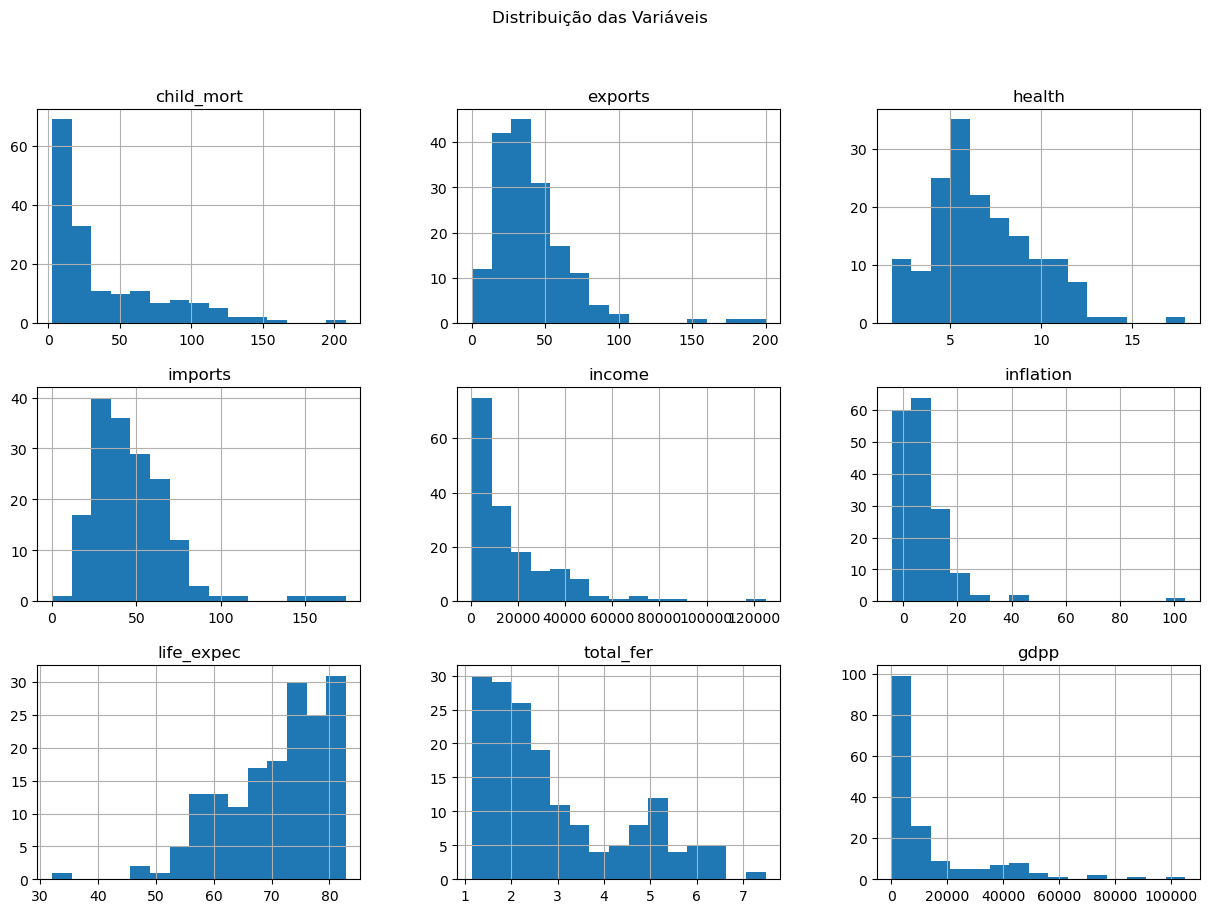

In [260]:
cols_analysis = country_data_df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize=(15, 10))

cols_analysis.boxplot(ax=ax)
ax.set_title('Boxplot das Colunas do Datset')
ax.set_ylabel('Valores')
ax.set_xticklabels(cols_analysis.columns, rotation=90)

plt.tight_layout()
plt.show()

country_data_df.iloc[:, 1:].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis')
plt.show()

## 2.4 Pré processamento dos dados

In [261]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_data = scaler.fit_transform(cols_analysis)
normalized_df = pd.DataFrame(scale_data, columns=cols_analysis.columns)
normalized_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


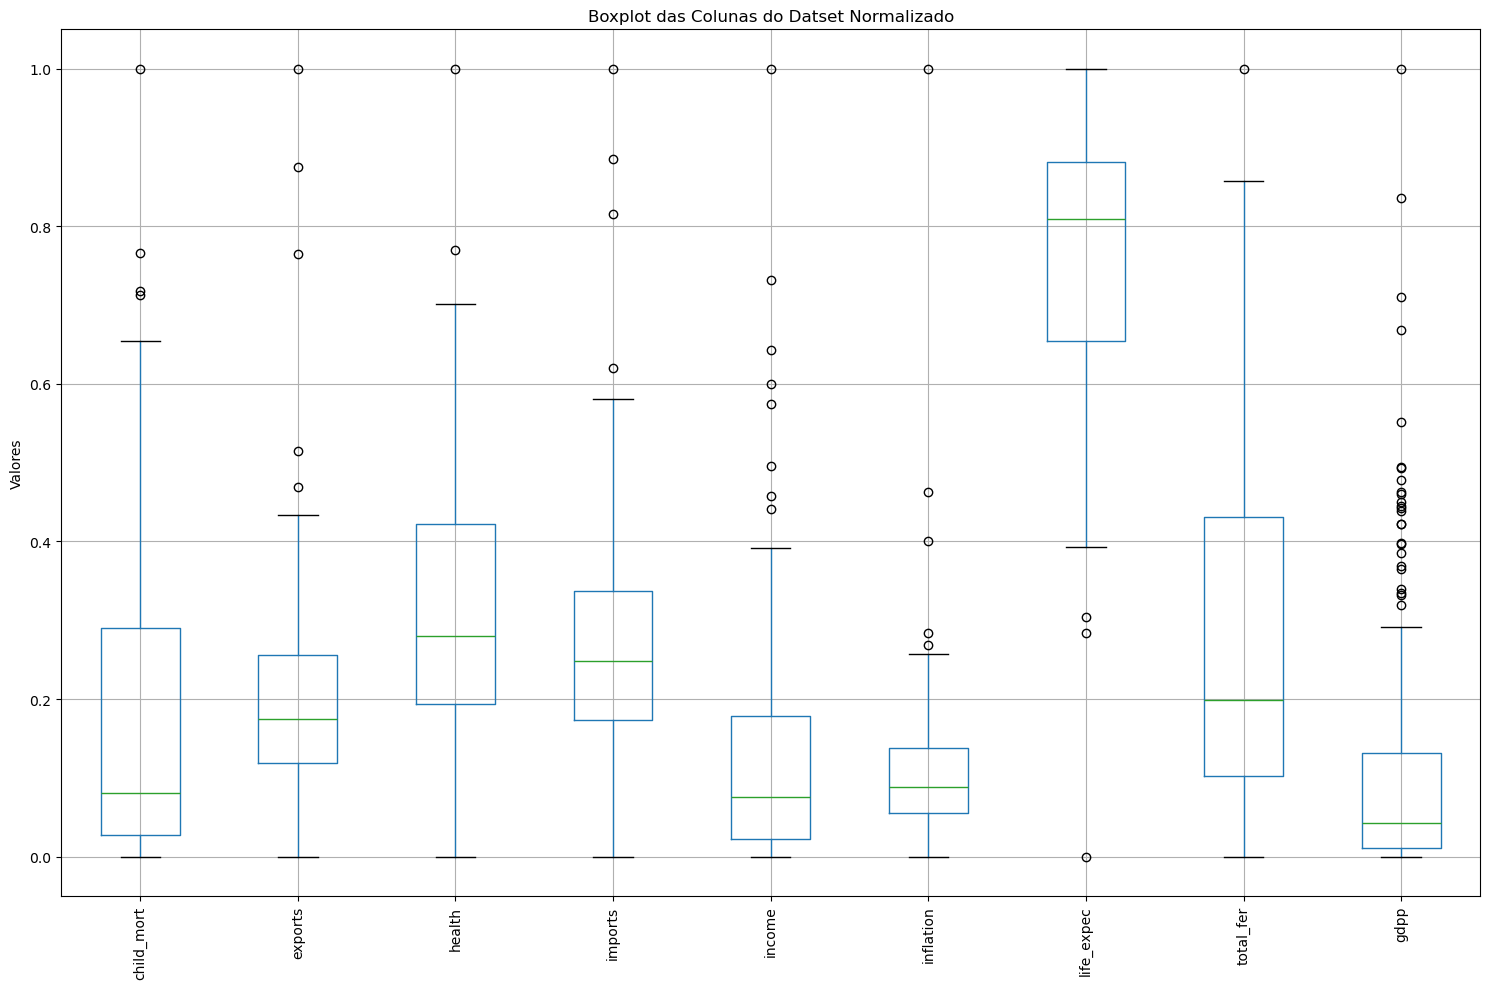

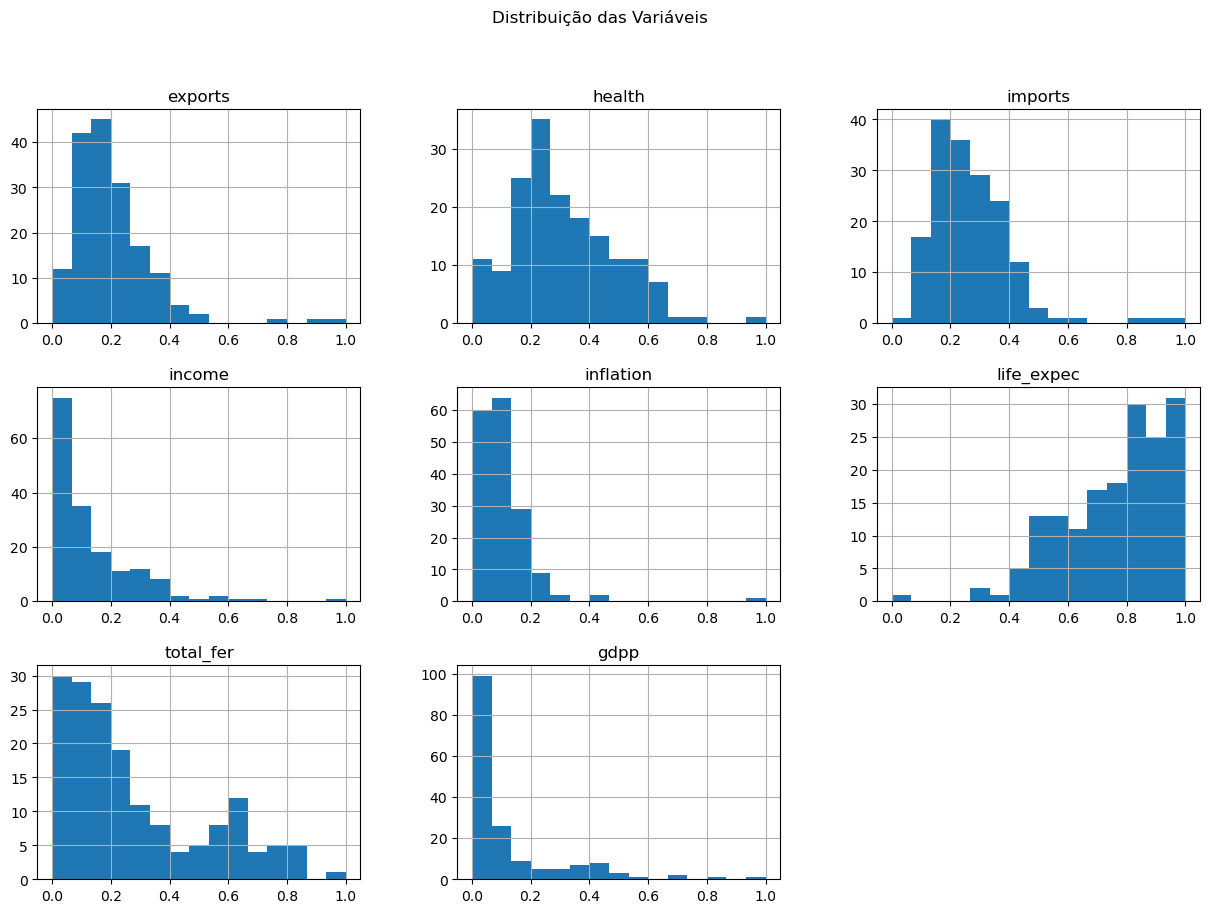

In [262]:
scaled_cols_analysis = normalized_df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize=(15, 10))

scaled_cols_analysis.boxplot(ax=ax)
ax.set_title('Boxplot das Colunas do Datset Normalizado')
ax.set_ylabel('Valores')
ax.set_xticklabels(cols_analysis.columns, rotation=90)

plt.tight_layout()
plt.show()

scaled_cols_analysis.iloc[:, 1:].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis')
plt.show()

# 3 Clusterização

## 3.1.a K-Means

In [263]:
from sklearn.cluster import KMeans

In [264]:
kmeans = KMeans(n_clusters=3,random_state=42)
normalized_df['cluster'] = kmeans.fit_predict(normalized_df)
normalized_df['cluster']

0      2
1      0
2      0
3      2
4      0
      ..
162    0
163    0
164    0
165    2
166    2
Name: cluster, Length: 167, dtype: int32

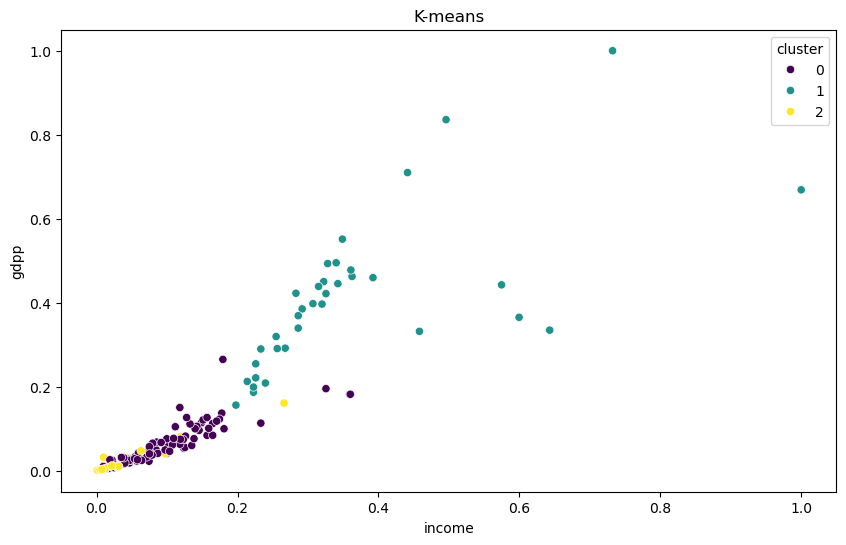

In [265]:
colunas_usadas = ['income', 'gdpp']
#colunas_usadas = ['child_mort', 'health']
#colunas_usadas = ['child_mort', 'life_expec']
#colunas_usadas = ['exports', 'imports']

plt.figure(figsize=(10, 6))
plt.title('K-means')
sns.scatterplot(data=normalized_df, x=colunas_usadas[0], y=colunas_usadas[1], hue='cluster', palette='viridis')
plt.xlabel(colunas_usadas[0])
plt.ylabel(colunas_usadas[1])
plt.show()

## 3.1.b Clusterização Hierarquica

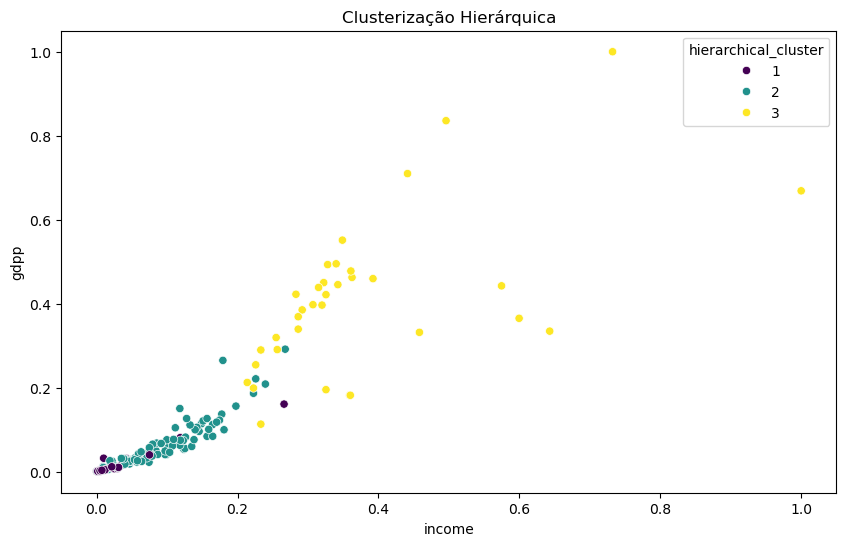

In [266]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(normalized_df.drop(columns=['cluster']), method='ward')
normalized_df['hierarchical_cluster'] = fcluster(link, 3, criterion='maxclust')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=normalized_df, x=colunas_usadas[0], y=colunas_usadas[1], hue='hierarchical_cluster', palette='viridis')
plt.title('Clusterização Hierárquica')
plt.xlabel(colunas_usadas[0])
plt.ylabel(colunas_usadas[1])
plt.show()

## 3.2 Analise dos  Dados

In [267]:
# Grupo 0
g0_df = normalized_df[normalized_df['cluster'] == 0].agg(['min', 'max', 'mean']).sort_values(colunas_usadas, ascending=False)
g0_df 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hierarchical_cluster
max,0.300876,0.46871,0.770044,0.620546,0.360082,0.463081,0.952663,0.503155,0.265050,0.0,3.000000
mean,0.096839,0.20199,0.275476,0.271713,0.096755,0.109138,0.796005,0.183854,0.061339,0.0,2.022989
min,0.009250,0.00000,0.009944,0.000000,0.009414,0.000000,0.437870,0.015773,0.003446,0.0,1.000000


In [268]:
# Grupo 1
g1_df = normalized_df[normalized_df['cluster'] == 1].agg(['min', 'max', 'mean']).sort_values(colunas_usadas, ascending=False)
g1_df 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hierarchical_cluster
max,0.039922,1.000000,1.00000,1.000000,1.000000,0.193235,1.000000,0.29653,1.000000,1.0,3.000000
mean,0.011184,0.291771,0.44173,0.295760,0.363321,0.062333,0.949620,0.09324,0.409340,1.0,2.857143
min,0.000000,0.061489,0.00000,0.077812,0.197691,0.009149,0.856016,0.00000,0.156239,1.0,2.000000


In [269]:
# Grupo 2
g2_df = normalized_df[normalized_df['cluster'] == 2].agg(['min', 'max', 'mean']).sort_values(colunas_usadas, ascending=False)
g2_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,hierarchical_cluster
max,1.000000,0.428689,0.701678,0.580301,0.266024,1.000000,0.769231,1.000000,0.161011,2.0,2.000000
mean,0.448556,0.143746,0.278392,0.243711,0.023687,0.151784,0.537322,0.624465,0.014068,2.0,1.133333
min,0.166991,0.010461,0.024239,0.098509,0.000000,0.047084,0.000000,0.315457,0.000000,2.0,1.000000


In [270]:
# child_mort = 1 < 0 < 2
# exports  = 1 > 0 > 2
# health = 1 > 2 > 0
# imports = 1 > 0 > 2
# income = 1 > 0 > 2
# inflation = 
# life_expect = 1 < 0 < 2
# total_fer = 2 > 0 > 1
# gdpp = 1 > 0 > 2


Considerando leganda  da visualização do K-Means
- Cluster 1  é referente a paises mais ricos , com maior qualidade de  vida , maior renda , menor inflação e menor mortalidade infantil
- Cluster 2 é referente a paises com menor renda, menor qualidade de vida, maior inflação e maior mortalidade infantil
- Cluster 0 é referente a paises com renda intermediária, qualidade de vida intermediária, inflação intermediária e mortalidade infantil intermediária

## 3.3 Dendrograma

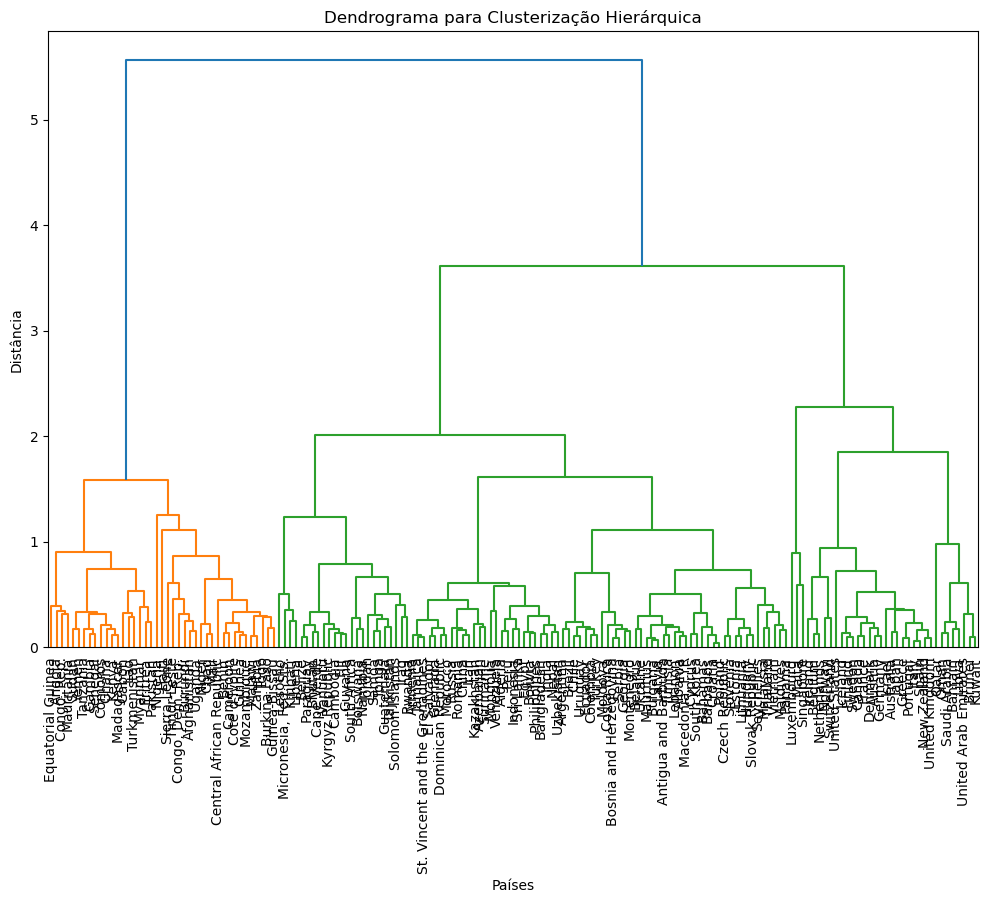

In [271]:
plt.figure(figsize=(12, 8))
dendrogram(link, labels=country_data_df['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma para Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância')
plt.show()

- Grupo laranja indica um cluster paises com menor renda ,menor qualidade de  vida  e mais ores problemas economicos
- Grupo verde agrupa os clusters de paises onde  as  analises da economia e qualidade de vida  são intermediárias e  altas.
- Pelo dendograma  podemos ver que  o numero de clusters  ideal é verificado pelo corte  entre os níveis 3 e 4, sendo assim temos  3 clusters. 

## 3.4 Conclusão

Analisando os dados do K-means e da clusterização podemos confirmar que existem 3 grupos de países, sendo eles. O Dedograma trás uma analise mais  detalhada de quão proximos estão os  países e como eles se agrupam.

# 4 Escolha de algorítmos

## 4.1 Algoritmo K-means

1. Definir numero de clusters
    Indica o numero de clusters que serão criados
2. Inicializar centróides
    Os centróides são pontos aleatórios dentro do espaço de dados onde os clusters serão criados
3. Atribuir cada ponto ao cluster mais próximo
    Calcular a distância entre cada ponto e o centróide e atribuir o ponto ao cluster mais próximo (centróide mais proximo)
4. Recalcular centróides
    Considerando os pontos atribuidos a cada cluster, recalcular os centróides
5. Repetir passos 3 e 4 até convergir
    Repetir os passos 3 e 4 até que os centróides não se movam mais

## 4.2 Ajuste no Algorítmo

1. Definir numero de clusters
    Indica o numero de clusters que serão criados
2. Inicializar centróides
    Os centróides são pontos aleatórios dentro do espaço de dados onde os clusters serão criados
3. Atribuir cada ponto ao cluster mais próximo
    Calcular a distância entre cada ponto e o centróide e atribuir o ponto ao cluster mais próximo (centróide mais proximo)
4. Recalcular centróides
    Considerando os pontos atribuidos a cada cluster, considere o ponto mais próximo do centroide  como medóide.
    considere o medóide como novo centroide do cluster
5. Repetir passos 3 e 4 até convergir
    Repetir os passos 3 e 4 até que os centróides não se movam mais

## 4.3 Algoritmo K-Means  é sensível a outliers?

O K-means é sensível a outliers, pois ao definir os centróides por meio das médias um ponto que esteja muito distante dos outros vai influenciar e deslocar este centróide para um ponto extremamente aquém do ideal e atrapalhar a convergência do algoritmo.

## 4.4 DbScan é sensível a  outliers?

O DBScan é menos sensível pois  isola  os outliers e os classifica como ruído. o DBscan considera a densidade dos pontos na hora de identificar os clusters, por isso consegue  isolar  estes outliers. 